# Learning Benefits, Manual modulation

Alana Jaskir <br>
Base code by Lise VANSTEENKISTE, intern <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

Manual modulation of D parameter in Bogacz model in learning paradigm

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import learningbogacz
from bogacz import Bogacz
import plot_dynamicsb
import importlib
import pickle
import datetime
import re
importlib.reload(plot_dynamicsb)

<module 'plot_dynamicsb' from '/Users/ajaskir/Desktop/Desktop - CLPS-Jaskir18/Projects/FYP/code/bogacz/plot_dynamicsb.py'>

In [6]:
# intialize parameters
alpha_a = 0.1   # learning rate 
epsilon=0.443   # damping
lbda=0.093      # decay
K=.1            # noise for max choice policy
beta = 15        # softmax temp
params=(alpha_a, epsilon, lbda, beta)

n_states = 1000
n_trials = 100
thresh = 50     # when to manual mod D
policy = "softmax"  # max or softmax

# analysis
plot_weights = True
plot_diff = True
plot_sm = False
save_me = True
load_me = not save_me  #avoid reloadiplot_diff = Trueng after saving, saving a file you just loaded with wrong filename info

# Rich environments

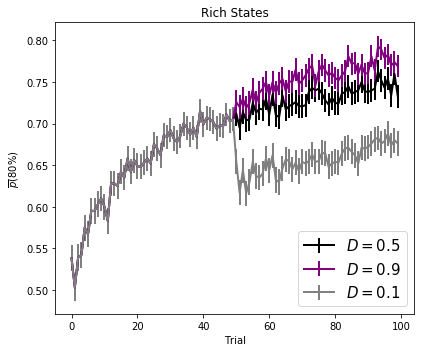

In [7]:
env = "rich"
rnd_seed = random.randint(1,100000)      # use same random seed to limit variance

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
R_states_5 = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy, D=0.5, thresh=thresh, k=K, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_5,n_trials,n_states,axs,"black")

R_states_9 = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy, D=0.9, thresh=thresh, k=K, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_9,n_trials,n_states,axs,"purple")

R_states_1 = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy, D=0.1, thresh=thresh, k=K, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_1,n_trials,n_states,axs,"gray")


plt.legend(("$D=0.5$", "$D=0.9$", "$D=0.1$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Rich States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(80\%)$")
plt.tight_layout()

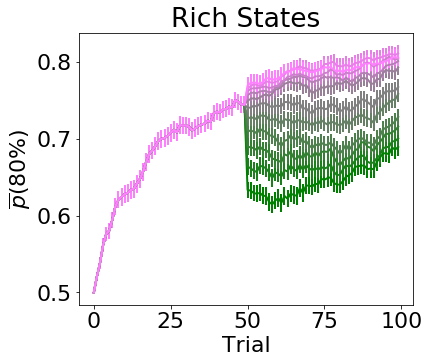

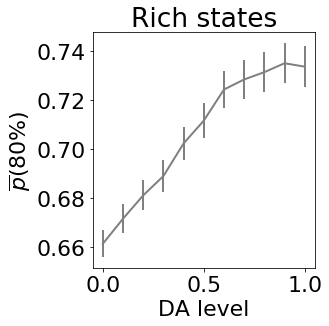

In [25]:
env = "rich"
rnd_seed = random.randint(1,100000)

# Different DA levels
offset = .1
Ds = np.arange(0, 1+offset, offset)
n_levels = len(Ds)

# initialize accumulators
mean_accs = []
sem_accs = []
R_all_states = []

# plot stuff
fig_trl, axs_trl = plt.subplots(figsize=(6, 5))
which =  Ds #Ds[np.array([1,5,9])]  # which levels to plot

for D in Ds:
    states = learningbogacz.simulateb(params,n_states,n_trials,env=env,policy=policy, D=D,thresh=thresh,rnd_seed=rnd_seed)
    # plot trial avg acc
    if (D in which):
        plot_dynamicsb.avg_ch(states,n_trials,n_states,axs_trl,(D,0.5,D))
    this_acc, this_sem=plot_dynamicsb.avg(states)
    
    # save all state info for this DA level
    R_all_states.append(states)
    
    # save average acc across states across all trials
    mean_accs.append(this_acc)
    sem_accs.append(this_sem)
    
#plt.legend(which,fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Rich States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(80\%)$")

# plot average acc by DA level
linewidth = 2.
color = "gray"
fig_avg, axs_avg = plt.subplots(figsize=(5, 5))
axs_avg.errorbar(Ds, mean_accs, yerr=sem_accs, c=color, linewidth=linewidth)
plt.title("Rich states")
plt.xlabel("DA level")
plt.ylabel("$\overline{p}(80\%)$")
plt.rcParams.update({'font.size': 22})
plt.tight_layout()

plt.rcParams.update({'font.size': 22})

In [16]:
Rstates_to_plot = R_all_states[np.where(Ds == 0.5)[0][0]]
# plot softmax values if applicable
if plot_sm:
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    plot_dynamicsb.avg_sm(Rstates_to_plot,n_trials,n_states,0,ax1,"gray")

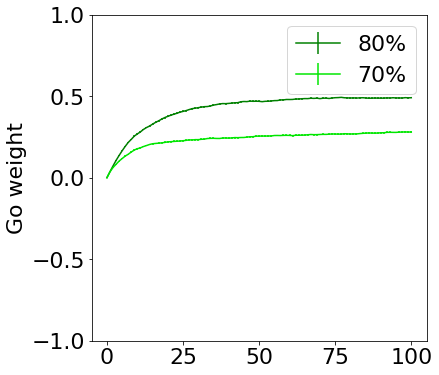

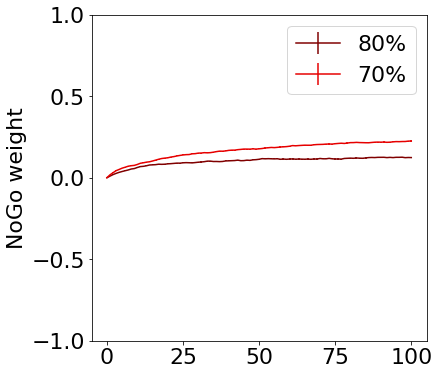

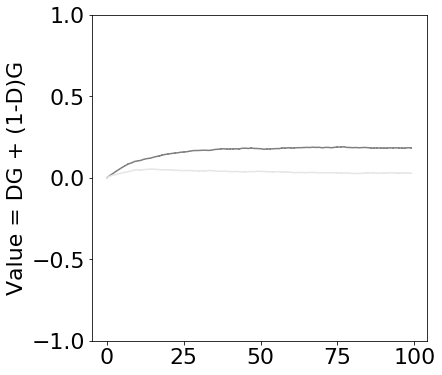

In [17]:
# plot weights 
if plot_weights:
    fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
    plt.ylim([-1,1])
    plt.ylabel("Go weight")
    fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
    plt.ylim([-1,1])
    plt.ylabel("NoGo weight")
    fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
    plt.ylim([-1,1])
    plt.ylabel("Value = DG + (1-D)G")
    axs = [ax1,ax2,ax3]
    plot_dynamicsb.avg_qs(Rstates_to_plot,n_trials,n_states,0,axs,.5)   # option 0 (opt)
    plot_dynamicsb.avg_qs(Rstates_to_plot,n_trials,n_states,1,axs,.9)   # option 1
    axs[0].legend(["80%", "70%"])
    axs[1].legend(["80%", "70%"])

# Lean Environments

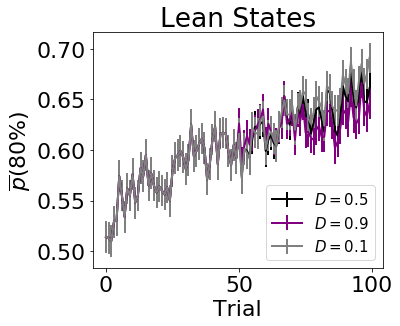

In [18]:
env = "lean"
rnd_seed = random.randint(1,100000)      # use same random seed to limit variance

# plot average sm
fig, axs = plt.subplots(figsize=(6, 5))
R_states_5 = learningbogacz.simulateb(params,n_states,n_trials,env=env,policy=policy, D=0.5, thresh=thresh, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_5,n_trials,n_states,axs,"black")

R_states_9 = learningbogacz.simulateb(params,n_states,n_trials,env=env,policy=policy, D=0.9, thresh=thresh, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_9,n_trials,n_states,axs,"purple")

R_states_1 = learningbogacz.simulateb(params,n_states,n_trials,env=env,policy=policy, D=0.1, thresh=thresh, rnd_seed=rnd_seed)
# plot average sm
plot_dynamicsb.avg_ch(R_states_1,n_trials,n_states,axs,"gray")


plt.legend(("$D=0.5$", "$D=0.9$", "$D=0.1$"), fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Lean States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(80\%)$")
plt.tight_layout()

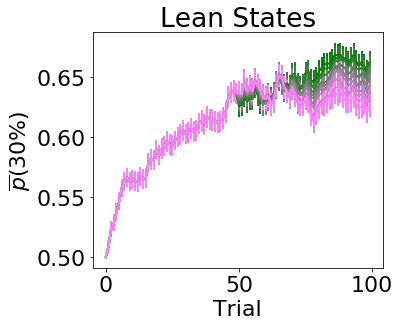

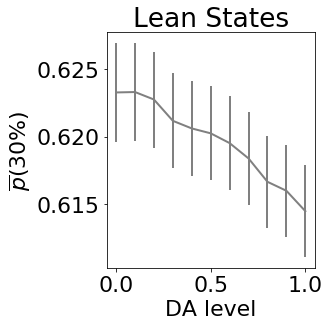

In [26]:
env = "lean"
rnd_seed = random.randint(1,100000)

# Different DA levels
offset = .1
Ds = np.arange(0, 1+offset, offset)
n_levels = len(Ds)

# initialize accumulators
mean_accs = []
sem_accs = []
L_all_states = []

# plot stuff
fig_trl, axs_trl = plt.subplots(figsize=(6, 5))
which =  Ds #Ds[np.array([1,5,9])]  # which levels to plot

for D in Ds:
    states = learningbogacz.simulateb(params,n_states,n_trials,env=env,policy=policy,D=D,thresh=thresh,rnd_seed=rnd_seed)
    # plot trial avg acc
    if (D in which):
        plot_dynamicsb.avg_sm(states,n_trials,n_states,0,axs_trl,(D,0.5,D))
    this_acc, this_sem =plot_dynamicsb.avg(states)
    
    # save all state info for this DA level
    L_all_states.append(states)
    
    # save average acc across states across all trials
    mean_accs.append(this_acc)
    sem_accs.append(this_sem)
            
#plt.legend(which,fontsize = 15, markerscale = 50, loc = 'lower right')
plt.title("Lean States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(30\%)$")
plt.tight_layout()

# plot average acc by DA level
linewidth = 2.
color = "gray"
fig_avg, axs_avg = plt.subplots(figsize=(5, 5))
axs_avg.errorbar(Ds, mean_accs, yerr=sem_accs, c=color, linewidth=linewidth)
plt.title("Lean States")
plt.xlabel("DA level")
plt.ylabel("$\overline{p}(30\%)$")
plt.rcParams.update({'font.size': 22})
plt.tight_layout()

In [20]:
Lstates_to_plot = L_all_states[np.where(Ds == 0.5)[0][0]]
# plot softmax values if applicable
if plot_sm:
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    plot_dynamicsb.avg_sm(Lstates_to_plot,n_trials,n_states,0,ax1,"gray")

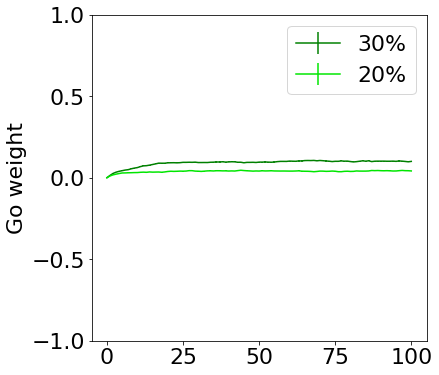

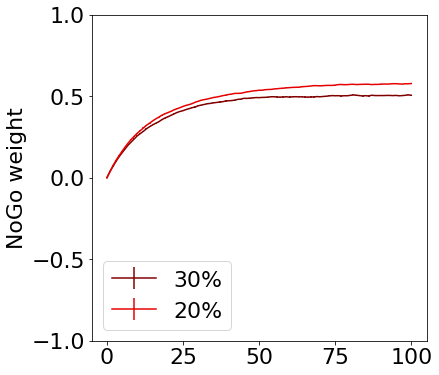

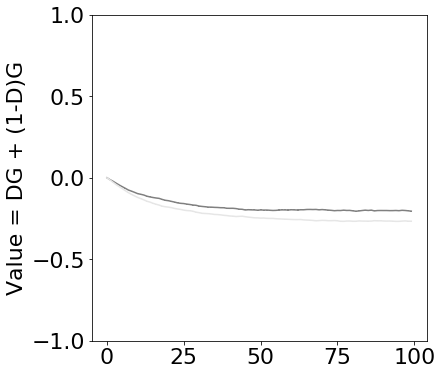

In [21]:
# plot weights 
if plot_weights:
    fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
    plt.ylim([-1,1])
    plt.ylabel("Go weight")
    fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
    plt.ylim([-1,1])
    plt.ylabel("NoGo weight")
    fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
    plt.ylim([-1,1])
    plt.ylabel("Value = DG + (1-D)G")
    axs = [ax1,ax2,ax3]
    plot_dynamicsb.avg_qs(Lstates_to_plot,n_trials,n_states,0,axs,.5)   # option 0 (opt)
    plot_dynamicsb.avg_qs(Lstates_to_plot,n_trials,n_states,1,axs,.9)   # option 1
    axs[0].legend(["30%", "20%"])
    axs[1].legend(["30%", "20%"])

In [ ]:
# save all that stuff I just did
if save_me:
    now = datetime.datetime.now()
    pickle.dump(R_all_states, open("data_rich_nstates%s_ntrials%s_thresh%s_policy%s_params%s_time%s.p" %(n_states, n_trials, thresh, policy, params, now.strftime("%Y-%m-%d %H:%M")), "wb"))
    pickle.dump(L_all_states, open("data_lean_nstates%s_ntrials%s_thresh%s_policy%s_params%s_time%s.p" %(n_states, n_trials, thresh, policy, params, now.strftime("%Y-%m-%d %H:%M")), "wb"))

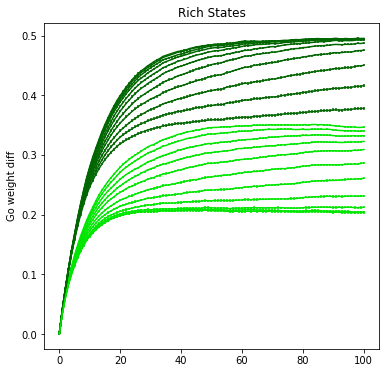

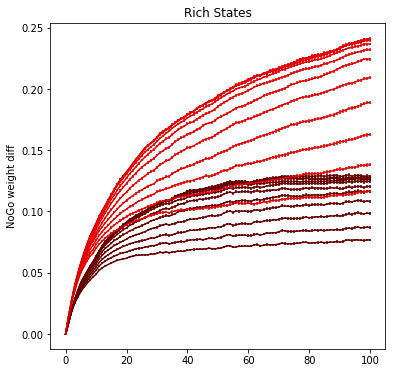

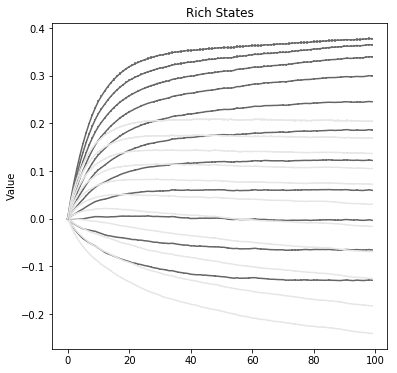

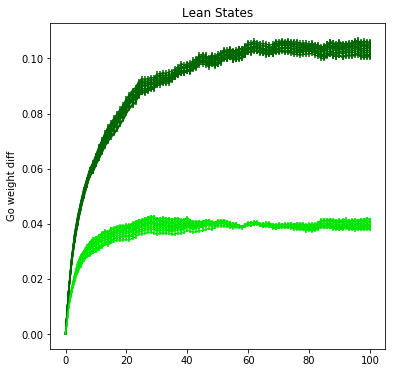

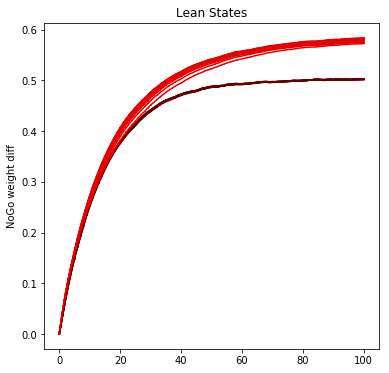

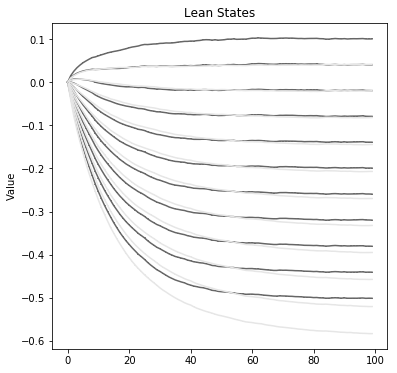

In [6]:
# file names
f1 = "data_lean_nstates10000_ntrials100_thresh0_policysoftmax_params(0.1, 0.443, 0.093, 0.1, 15)_time2019-08-30 08:24" 
f2 = "data_lean_nstates10000_ntrials100_thresh50_policysoftmax_params(0.1, 0.443, 0.093, 0.1, 15)_time2019-08-28 14:50"
f3 = "data_rich_nstates10000_ntrials100_thresh0_policysoftmax_params(0.1, 0.443, 0.093, 0.1, 15)_time2019-08-30 08:24"
f4 = "data_rich_nstates10000_ntrials100_thresh50_policysoftmax_params(0.1, 0.443, 0.093, 0.1, 15)_time2019-08-28 14:50"

if load_me:
    r_file = f3
    l_file = f1
    R_all_states = pickle.load(open( r_file, "rb" )) 
    L_all_states = pickle.load(open( l_file, "rb" ))
    
    # get params files
    n_states = int(re.search('nstates(.*)_ntrials', r_file).group(1))
    n_trials = int(re.search('ntrials(.*)_thresh', r_file).group(1))
    params = eval(re.search('params(.*)_time', r_file).group(1))
    
    # plot diff in G and N evolution
    offset = .1
    Ds = np.arange(0, 1+offset, offset)
    # rich env
    fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
    plt.title("Rich States")
    plt.ylabel("Go weight diff")
    fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
    plt.title("Rich States")
    plt.ylabel("NoGo weight diff")  
    fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
    plt.title("Rich States")
    plt.ylabel("Value") 
    axs = [ax1,ax2,ax3]
    for D in Ds:
        idx = np.where(D == Ds)[0][0]
        plot_dynamicsb.avg_qs(R_all_states[idx],n_trials,n_states,0,axs,.4)   # option 0 (opt)
        plot_dynamicsb.avg_qs(R_all_states[idx],n_trials,n_states,1,axs,.9)   # option 1 
    
    # lean env
    fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
    plt.title("Lean States")
    plt.ylabel("Go weight diff")
    fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
    plt.title("Lean States")
    plt.ylabel("NoGo weight diff")
    fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
    plt.title("Lean States")
    plt.ylabel("Value") 
    axs = [ax1,ax2,ax3]
    for D in Ds:
        idx = np.where(D == Ds)[0][0]
        plot_dynamicsb.avg_qs(L_all_states[idx],n_trials,n_states,0,axs,.4)   # option 0 (opt)
        plot_dynamicsb.avg_qs(L_all_states[idx],n_trials,n_states,1,axs,.9)   # option 1 

# Value -based modulation

In [13]:
# intialize parameters
alpha_a = 0.1   # learning rate 
epsilon=0.443   # damping
lbda=0.093      # decay
K=.1            # noise for max choice policy
k= 5            # multiplier for DA
beta = 10       # softmax temp  

# alpha = 0.1
# epsilon =0.6327
# beta = 5
# lbda = 0.0204

alpha = 0.4
epsilon =0.519
beta = 8
lbda = 0.1013

params=(alpha_a, epsilon, lbda, beta)

n_states = 10000
n_trials = 40
policy = "softmax"  # max or softmax
importlib.reload(learningbogacz)

<module 'learningbogacz' from '/Users/ajaskir/Desktop/Brown/Projects/FYP/code/bogacz/learningbogacz.py'>

In [14]:
env = "rich"
rnd_seed = random.randint(1,100000)      # use same random seed to limit variance

# plot average sm
R_states_zero = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy,D=0.5,rnd_seed=rnd_seed)
R_states_value = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy,mod="value",k=k,rnd_seed=rnd_seed)

(0.49, 0.71)

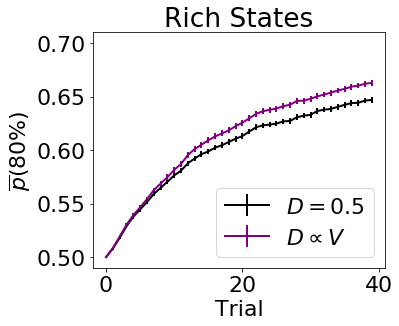

In [15]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamicsb.avg_sm(R_states_zero,n_trials,n_states,0,axs,"black")
plot_dynamicsb.avg_sm(R_states_value,n_trials,n_states,0,axs,"purple")
plt.legend(("$D=0.5$", "$D\propto V$"), fontsize = 22, markerscale = 50, loc = 'lower right')
plt.title("Rich States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(80\%)$")
plt.tight_layout()
plt.ylim([.49,.71])

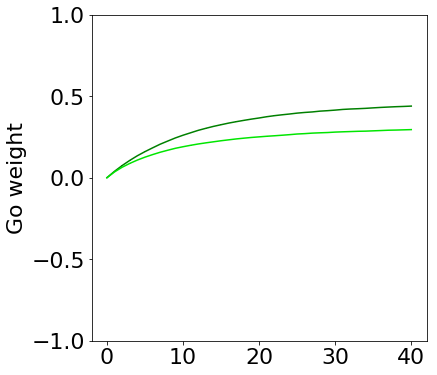

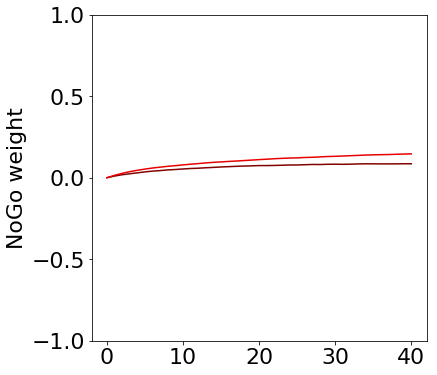

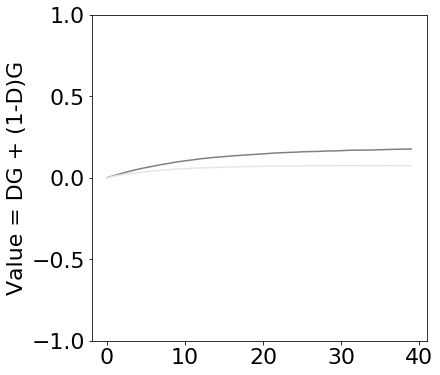

In [16]:
fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
plt.ylim([-1,1])
plt.ylabel("Go weight")
fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
plt.ylim([-1,1])
plt.ylabel("NoGo weight")
fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
plt.ylim([-1,1])
plt.ylabel("Value = DG + (1-D)G")
axs = [ax1,ax2,ax3]
plot_dynamicsb.avg_qs(R_states_zero,n_trials,n_states,0,axs,.5)   # option 0 (opt)
plot_dynamicsb.avg_qs(R_states_zero,n_trials,n_states,1,axs,.9)   # option 1 

In [18]:
env = "lean"
rnd_seed = random.randint(1,100000)      # use same random seed to limit variance

# plot average sm
L_states_zero = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy,D=0.5,rnd_seed=rnd_seed)
L_states_value = learningbogacz.simulate(params,n_states,n_trials,env=env,policy=policy,mod="value",k=k,rnd_seed=rnd_seed)

(0.49, 0.71)

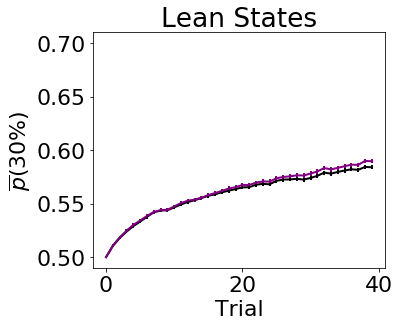

In [19]:
fig, axs = plt.subplots(figsize=(6, 5))
plot_dynamicsb.avg_sm(L_states_zero,n_trials,n_states,0,axs,"black")
plot_dynamicsb.avg_sm(L_states_value,n_trials,n_states,0,axs,"purple")
#plt.legend(("$D=0.5$", "$D\propto V$"), fontsize = 22, markerscale = 50, loc = 'lower right')
plt.title("Lean States")
plt.xlabel("Trial")
plt.ylabel("$\overline{p}(30\%)$")
plt.tight_layout()
plt.ylim([.49,.71])

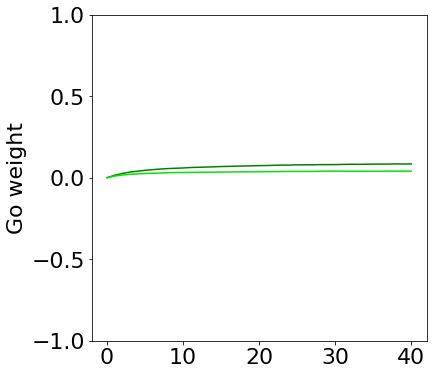

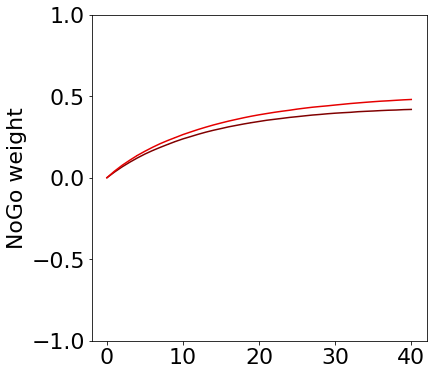

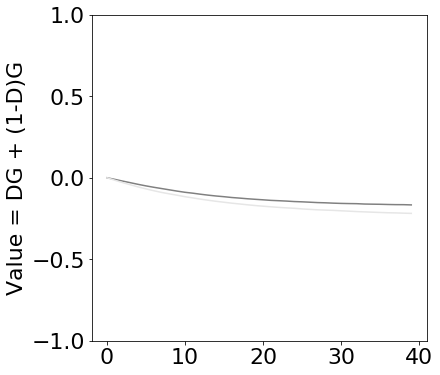

In [20]:
fig1, ax1 = plt.subplots(figsize=(6, 6))   # go actor evolution
plt.ylim([-1,1])
plt.ylabel("Go weight")
fig2, ax2 = plt.subplots(figsize=(6, 6))   # no go actor evolution
plt.ylim([-1,1])
plt.ylabel("NoGo weight")
fig3, ax3 = plt.subplots(figsize=(6, 6))   # value evolution
plt.ylim([-1,1])
plt.ylabel("Value = DG + (1-D)G")
axs = [ax1,ax2,ax3]
plot_dynamicsb.avg_qs(L_states_zero,n_trials,n_states,0,axs,.5)   # option 0 (opt)
plot_dynamicsb.avg_qs(L_states_zero,n_trials,n_states,1,axs,.9)   # option 1 